In [1]:
import pandas as pd
heart_disease_data = pd.read_csv("C:/Users/JT Herren/Desktop/Desktop/College Files/2023-2024/Spring Quarter/STA 160/Data/heartdisease_healthindicators.csv")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
heart_disease_data.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
demographic_data = heart_disease_data[['HeartDiseaseorAttack', 'Stroke', 'Diabetes', 
                                       'AnyHealthcare','NoDocbcCost', 'Sex', 'Age',
                                      'Education', 'Income']]

In [4]:
demographic_data['Diabetes'] = demographic_data['Diabetes'].replace(2, 1)
demographic_data.head(5)


C:\Users\JT Herren\AppData\Local\Temp\ipykernel_59580\3024632980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['Diabetes'] = demographic_data['Diabetes'].replace(2, 1)


,HeartDiseaseorAttack,Stroke,Diabetes,AnyHealthcare,NoDocbcCost,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,1.0,0.0,7.0,6.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,9.0,4.0,8.0
3,0.0,0.0,0.0,1.0,0.0,0.0,11.0,3.0,6.0
4,0.0,0.0,0.0,1.0,0.0,0.0,11.0,5.0,4.0


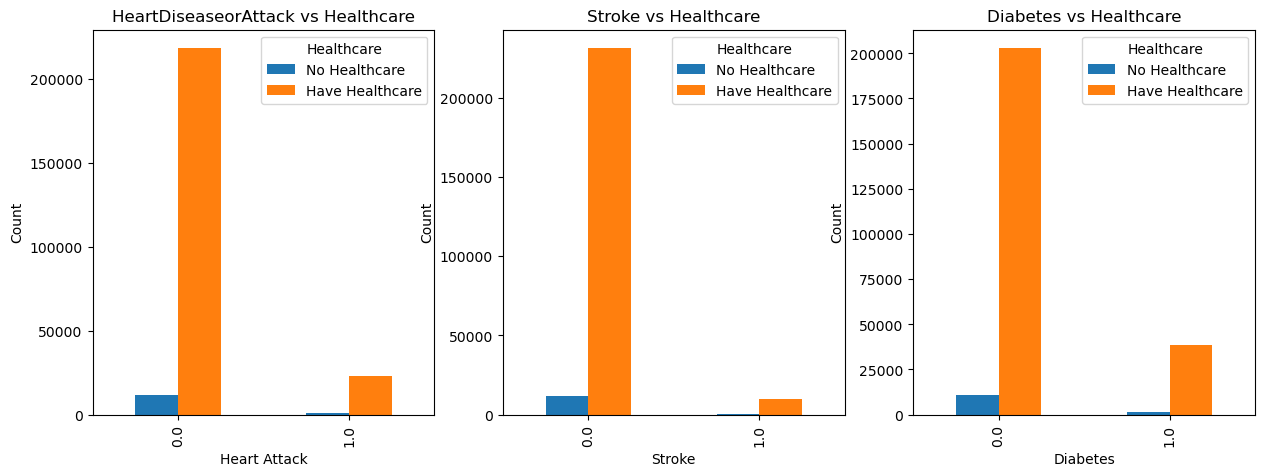

In [5]:
import matplotlib.pyplot as plt
health_attack = demographic_data.groupby(['HeartDiseaseorAttack', 'AnyHealthcare']).size().unstack(fill_value=0)
health_stroke = demographic_data.groupby(['Stroke', 'AnyHealthcare']).size().unstack(fill_value=0)
health_diabetes = demographic_data.groupby(['Diabetes', 'AnyHealthcare']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# HeartDiseaseorAttack
health_attack.plot(kind='bar', ax=ax[0], stacked=False)
ax[0].set_title('HeartDiseaseorAttack vs Healthcare')
ax[0].set_xlabel('Heart Attack')
ax[0].set_ylabel('Count')
ax[0].legend(title='Healthcare', labels=['No Healthcare', 'Have Healthcare'])

# Stroke
health_stroke.plot(kind='bar', ax=ax[1], stacked=False)
ax[1].set_title('Stroke vs Healthcare')
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('Count')
ax[1].legend(title='Healthcare', labels=['No Healthcare', 'Have Healthcare'])

# Diabetes
health_diabetes.plot(kind='bar', ax=ax[2], stacked=False)
ax[2].set_title('Diabetes vs Healthcare')
ax[2].set_xlabel('Diabetes')
ax[2].set_ylabel('Count')
ax[2].legend(title='Healthcare', labels=['No Healthcare', 'Have Healthcare'])

plt.show()

In both having and not having the response conditions having healthcare is the more prevalent group. However, the amount of people counted in the not having the conditions who have health care is significantly higher than any other group this would suggest that significantly more people in this dataset have healthcare which may make this not the best variable to focus on due to some inherent overall bias. I do think this seems suggests having healthcare decreases the chances.

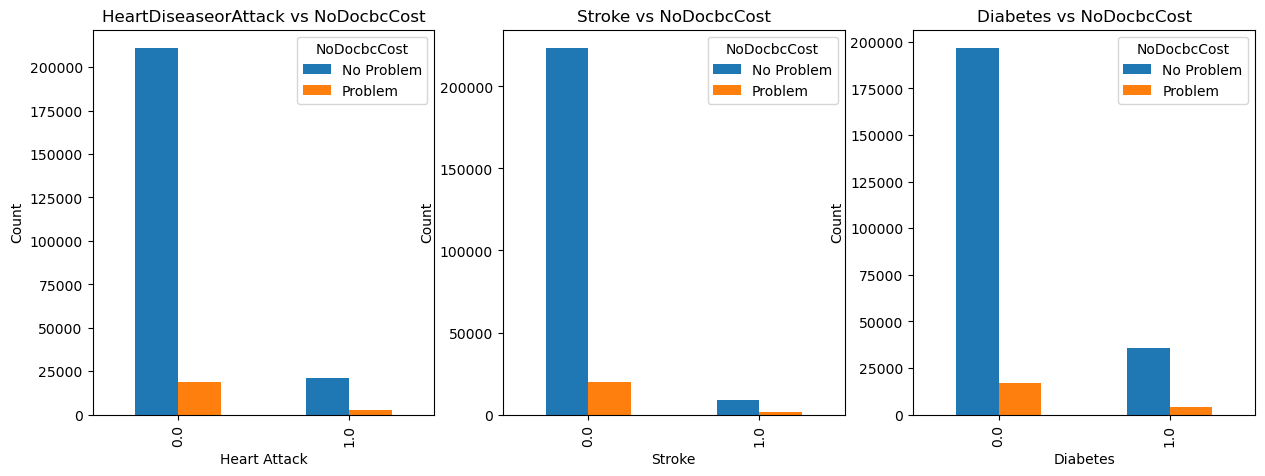

In [6]:
nodoc_attack = demographic_data.groupby(['HeartDiseaseorAttack', 'NoDocbcCost']).size().unstack(fill_value=0)
nodoc_stroke = demographic_data.groupby(['Stroke', 'NoDocbcCost']).size().unstack(fill_value=0)
nodoc_diabetes = demographic_data.groupby(['Diabetes', 'NoDocbcCost']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# HeartDiseaseorAttack
nodoc_attack.plot(kind='bar', ax=ax[0], stacked=False)
ax[0].set_title('HeartDiseaseorAttack vs NoDocbcCost')
ax[0].set_xlabel('Heart Attack')
ax[0].set_ylabel('Count')
ax[0].legend(title='NoDocbcCost', labels=['No Problem', 'Problem'])

# Stroke
nodoc_stroke.plot(kind='bar', ax=ax[1], stacked=False)
ax[1].set_title('Stroke vs NoDocbcCost')
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('Count')
ax[1].legend(title='NoDocbcCost', labels=['No Problem', 'Problem'])

# Diabetes
nodoc_diabetes.plot(kind='bar', ax=ax[2], stacked=False)
ax[2].set_title('Diabetes vs NoDocbcCost')
ax[2].set_xlabel('Diabetes')
ax[2].set_ylabel('Count')
ax[2].legend(title='NoDocbcCost', labels=['No Problem', 'Problem'])

plt.show()

I'm a bit confused by the result of this category in respect to the other as these barplots show that in all categories not being able to see a doctor is the more common group. Despite the previous barplots suggesting most of the people included have healthcare I guess they still did not have enough money to visit the doctor. This might be more indicative of the cost of healthcare than not being able to see a doctor leading to the response conditions. I guess it could also suggest that more of the people have had less serious conditions in the past year that do not require a doctor visit. 

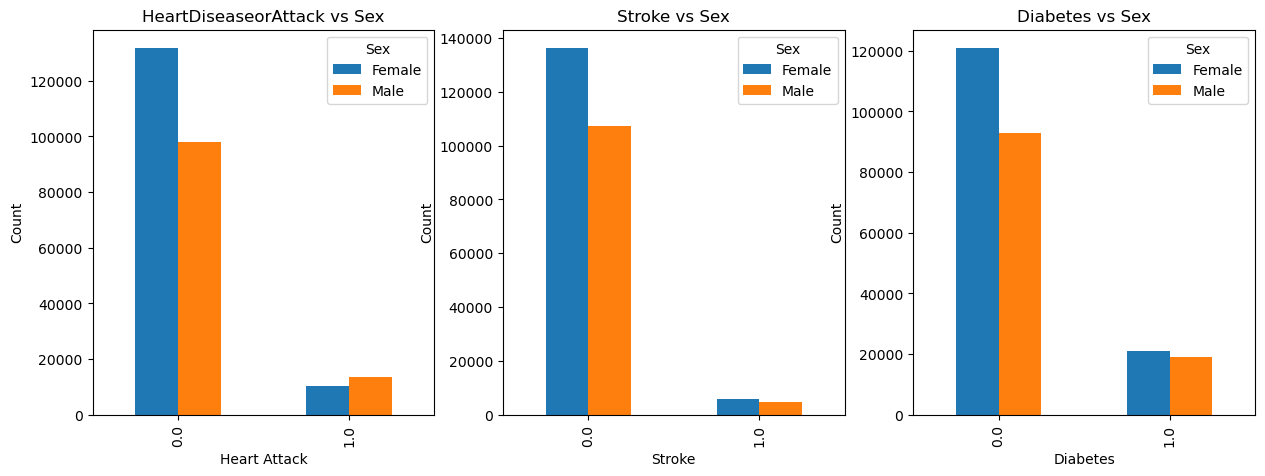

In [7]:
sex_attack = demographic_data.groupby(['HeartDiseaseorAttack', 'Sex']).size().unstack(fill_value=0)
sex_stroke = demographic_data.groupby(['Stroke', 'Sex']).size().unstack(fill_value=0)
sex_diabetes = demographic_data.groupby(['Diabetes', 'Sex']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# HeartDiseaseorAttack
sex_attack.plot(kind='bar', ax=ax[0], stacked=False)
ax[0].set_title('HeartDiseaseorAttack vs Sex')
ax[0].set_xlabel('Heart Attack')
ax[0].set_ylabel('Count')
ax[0].legend(title='Sex', labels=['Female', 'Male'])

# Stroke
sex_stroke.plot(kind='bar', ax=ax[1], stacked=False)
ax[1].set_title('Stroke vs Sex')
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('Count')
ax[1].legend(title='Sex', labels=['Female', 'Male'])

# Diabetes
sex_diabetes.plot(kind='bar', ax=ax[2], stacked=False)
ax[2].set_title('Diabetes vs Sex')
ax[2].set_xlabel('Diabetes')
ax[2].set_ylabel('Count')
ax[2].legend(title='Sex', labels=['Female', 'Male'])

plt.show()

I will not that 30000 more women are in this dataset than men which may make this a bit harder to interpret. I do notice that the gap between men and women is significantly larger in the not having the response conditions than the having the conditions category which I would think suggests women are less prone to these conditions. Might be indicative of healthier/safer lifestyles.

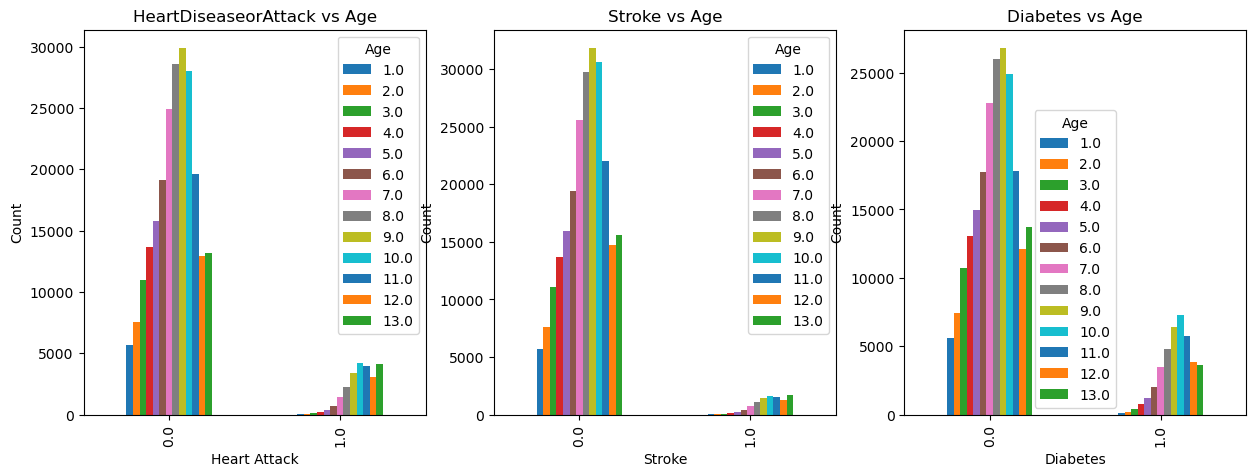

In [8]:
age_attack = demographic_data.groupby(['HeartDiseaseorAttack', 'Age']).size().unstack(fill_value=0)
age_stroke = demographic_data.groupby(['Stroke', 'Age']).size().unstack(fill_value=0)
age_diabetes = demographic_data.groupby(['Diabetes', 'Age']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# HeartDiseaseorAttack
age_attack.plot(kind='bar', ax=ax[0], stacked=False)
ax[0].set_title('HeartDiseaseorAttack vs Age')
ax[0].set_xlabel('Heart Attack')
ax[0].set_ylabel('Count')

# Stroke
age_stroke.plot(kind='bar', ax=ax[1], stacked=False)
ax[1].set_title('Stroke vs Age')
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('Count')

# Diabetes
age_diabetes.plot(kind='bar', ax=ax[2], stacked=False)
ax[2].set_title('Diabetes vs Age')
ax[2].set_xlabel('Diabetes')
ax[2].set_ylabel('Count')

plt.show()

The not having the conditions category would suggest that most of the people in this data are middle aged. For heart attack/disease it would appear that as people get older ther chance increases but eventually tapers off at around the 50s/60s age range. The pattern for strok seems similar the condition seems much less common though. Diabetes is different as you get older it increases but at a certain point the chance drops drastically in the 60+ range.

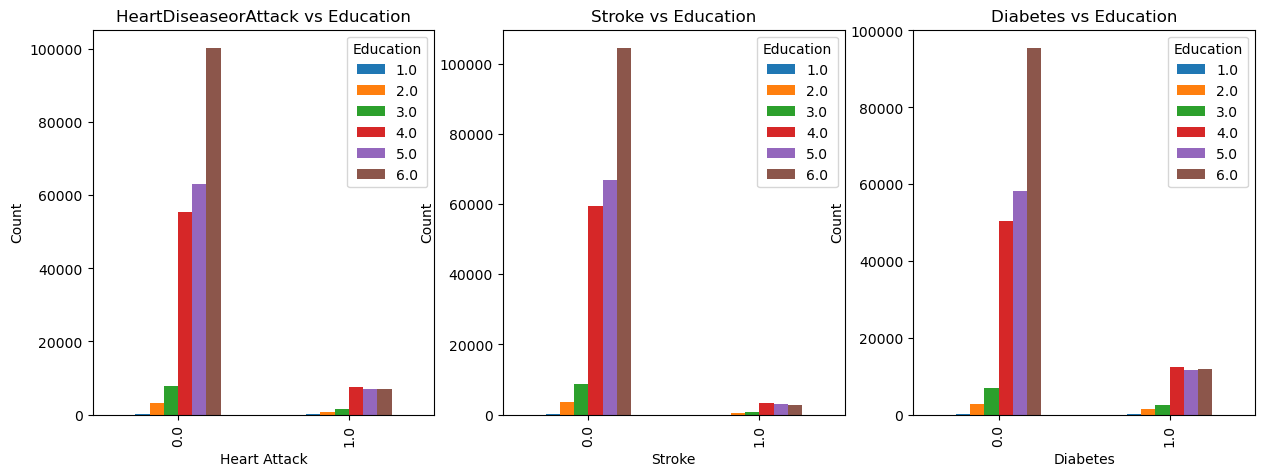

In [9]:
education_attack = demographic_data.groupby(['HeartDiseaseorAttack', 'Education']).size().unstack(fill_value=0)
education_stroke = demographic_data.groupby(['Stroke', 'Education']).size().unstack(fill_value=0)
education_diabetes = demographic_data.groupby(['Diabetes', 'Education']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# HeartDiseaseorAttack
education_attack.plot(kind='bar', ax=ax[0], stacked=False)
ax[0].set_title('HeartDiseaseorAttack vs Education')
ax[0].set_xlabel('Heart Attack')
ax[0].set_ylabel('Count')

# Stroke
education_stroke.plot(kind='bar', ax=ax[1], stacked=False)
ax[1].set_title('Stroke vs Education')
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('Count')

# Diabetes
education_diabetes.plot(kind='bar', ax=ax[2], stacked=False)
ax[2].set_title('Diabetes vs Education')
ax[2].set_xlabel('Diabetes')
ax[2].set_ylabel('Count')

plt.show()

Higher educated people seem to be the most common group in this dataset. It is a bit hard to interpret this as the gaps for each group from each other are not drastically different in the having the conditions or not it would seem this is more indicative of the ages of the people included in this set. More full of people that are old enough to have had higher education. it would seem the education groups 4, 5, and 6 have pretty similar chances of having these conditions.

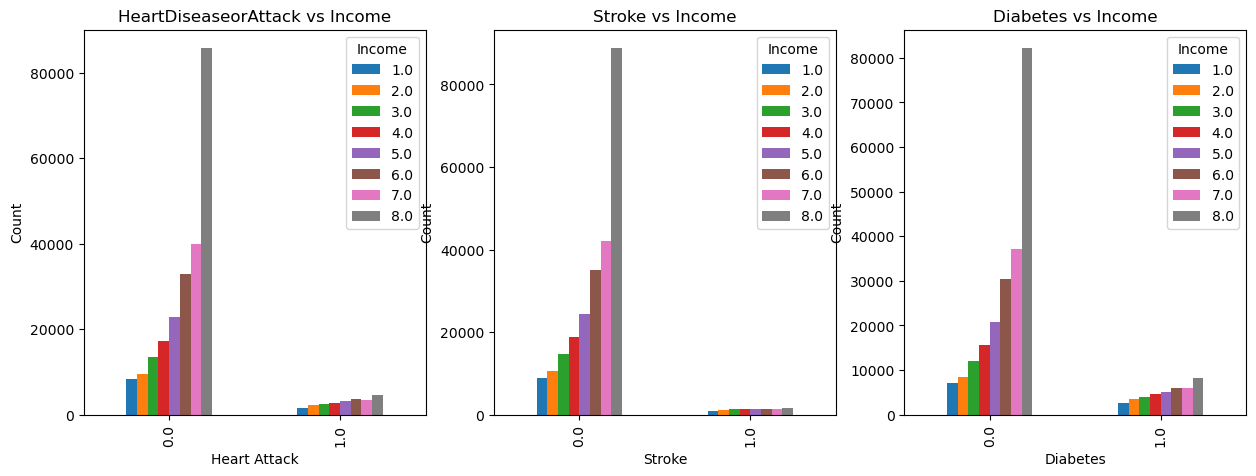

In [10]:
income_attack = demographic_data.groupby(['HeartDiseaseorAttack', 'Income']).size().unstack(fill_value=0)
income_stroke = demographic_data.groupby(['Stroke', 'Income']).size().unstack(fill_value=0)
income_diabetes = demographic_data.groupby(['Diabetes', 'Income']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# HeartDiseaseorAttack
income_attack.plot(kind='bar', ax=ax[0], stacked=False)
ax[0].set_title('HeartDiseaseorAttack vs Income')
ax[0].set_xlabel('Heart Attack')
ax[0].set_ylabel('Count')

# Stroke
income_stroke.plot(kind='bar', ax=ax[1], stacked=False)
ax[1].set_title('Stroke vs Income')
ax[1].set_xlabel('Stroke')
ax[1].set_ylabel('Count')

# Diabetes
income_diabetes.plot(kind='bar', ax=ax[2], stacked=False)
ax[2].set_title('Diabetes vs Income')
ax[2].set_xlabel('Diabetes')
ax[2].set_ylabel('Count')

plt.show()

This seems to indicate that people in higher income groups are less likely to have these conditions.

In [11]:
contingency_table = pd.crosstab(index=[demographic_data['AnyHealthcare'], demographic_data['NoDocbcCost'], 
                                       demographic_data['Sex'], demographic_data['Age'], demographic_data['Education'], 
                                       demographic_data['Income']], 
                                 columns=[demographic_data['HeartDiseaseorAttack'], demographic_data['Stroke'], 
                                          demographic_data['Diabetes']], 
                                 rownames=['AnyHealthcare', 'NoDocbcCost', 'Sex', 
                                           'Age', 'Education', 'Income'], 
                                 colnames=['HeartDiseaseorAttack', 'Stroke', 'Diabetes'])



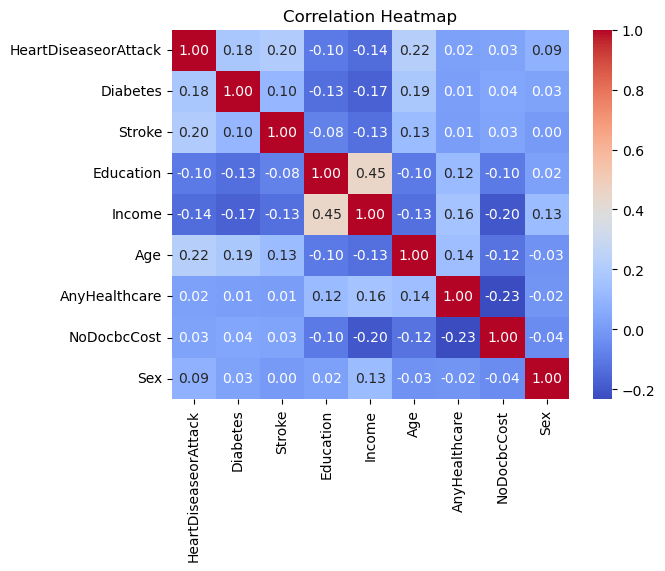

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_data = demographic_data[['HeartDiseaseorAttack', 'Diabetes','Stroke', 'Education', 'Income', 'Age', 
                         'AnyHealthcare', 'NoDocbcCost', 'Sex']]
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\JT Herren\AppData\Local\Temp\ipykernel_59580\3430228374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['Total'] = disease_total


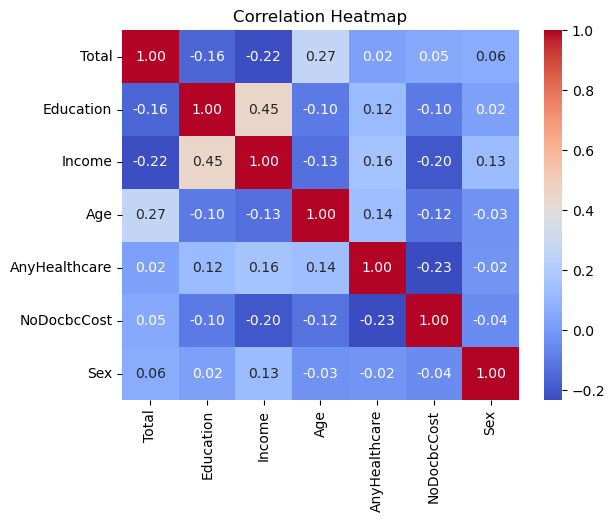

In [13]:
disease_total = demographic_data['HeartDiseaseorAttack'] + demographic_data['Stroke'] + demographic_data['Diabetes']
demographic_data['Total'] = disease_total
correlation_data = demographic_data[['Total', 'Education', 'Income', 'Age', 
                         'AnyHealthcare', 'NoDocbcCost', 'Sex']]
corr_matrix = correlation_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

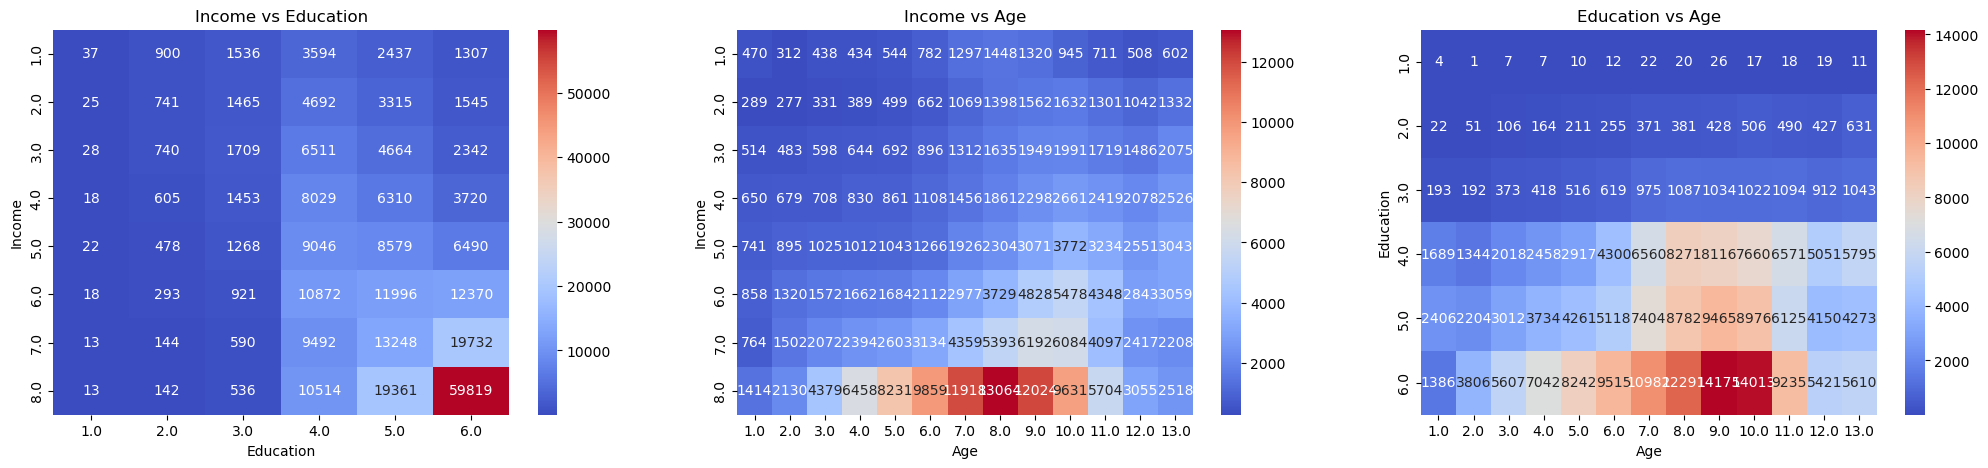

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

tab1 = pd.crosstab(demographic_data['Income'], demographic_data['Education'])
tab2 = pd.crosstab(demographic_data['Income'], demographic_data['Age'])
tab3 = pd.crosstab(demographic_data['Education'], demographic_data['Age'])

sns.heatmap(tab1, annot=True, cmap="coolwarm", fmt="d", ax=axes[0])
axes[0].set_title('Income vs Education')
axes[0].set_xlabel(tab1.columns.name)
axes[0].set_ylabel(tab1.index.name)


sns.heatmap(tab2, annot=True, cmap="coolwarm", fmt="d", ax=axes[1])
axes[1].set_title('Income vs Age')
axes[1].set_xlabel(tab2.columns.name)
axes[1].set_ylabel(tab2.index.name)

sns.heatmap(tab3, annot=True, cmap="coolwarm", fmt="d", ax=axes[2])
axes[2].set_title('Education vs Age')
axes[2].set_xlabel(tab3.columns.name)
axes[2].set_ylabel(tab3.index.name)


plt.show()

In [16]:
table1 = pd.crosstab(demographic_data['Stroke'], demographic_data['Age'])

table2 = pd.crosstab(demographic_data['Stroke'], demographic_data['Education'])

table3 = pd.crosstab(demographic_data['Stroke'], demographic_data['Income'])

print(table1)
print(table2)
print(table3)

Age     1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    10.0  \
Stroke                                                                       
0.0     5679  7569  11040  13686  15928  19451  25592  29747  31830  30574   
1.0       21    29     83    137    229    368    722   1085   1414   1620   

Age      11.0   12.0   13.0  
Stroke                       
0.0     21976  14689  15627  
1.0      1557   1291   1736  
Education  1.0   2.0   3.0    4.0    5.0     6.0
Stroke                                          
0.0        160  3697  8648  59452  66927  104504
1.0         14   346   830   3298   2983    2821
Income   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0
Stroke                                                       
0.0     8913  10607  14710  18821  24477  35034  41967  88859
1.0      898   1176   1284   1314   1406   1436   1252   1526


In [17]:
table1 = pd.crosstab(demographic_data['Diabetes'], demographic_data['Age'])

table2 = pd.crosstab(demographic_data['Diabetes'], demographic_data['Education'])

table3 = pd.crosstab(demographic_data['Diabetes'], demographic_data['Income'])

print(table1)
print(table2)
print(table3)

Age       1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    10.0  \
Diabetes                                                                       
0.0       5601  7404  10737  13055  14943  17765  22808  26019  26809  24939   
1.0         99   194    386    768   1214   2054   3506   4813   6435   7255   

Age        11.0   12.0   13.0  
Diabetes                       
0.0       17790  12132  13701  
1.0        5743   3848   3662  
Education  1.0   2.0   3.0    4.0    5.0    6.0
Diabetes                                       
0.0        125  2699  6868  50334  58223  95454
1.0         49  1344  2610  12416  11687  11871
Income     1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0
Diabetes                                                      
0.0       7114  8341  12005  15622  20792  30431  37219  82179
1.0       2697  3442   3989   4513   5091   6039   6000   8206


In [18]:
table1 = pd.crosstab(demographic_data['HeartDiseaseorAttack'], demographic_data['Age'])

table2 = pd.crosstab(demographic_data['HeartDiseaseorAttack'], demographic_data['Education'])

table3 = pd.crosstab(demographic_data['HeartDiseaseorAttack'], demographic_data['Income'])

print(table1)
print(table2)
print(table3)

Age                   1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0   \
HeartDiseaseorAttack                                                         
0.0                   5671  7544  10997  13630  15806  19107  24889  28579   
1.0                     29    54    126    193    351    712   1425   2253   

Age                    9.0    10.0   11.0   12.0   13.0  
HeartDiseaseorAttack                                     
0.0                   29886  28001  19586  12887  13204  
1.0                    3358   4193   3947   3093   4159  
Education             1.0   2.0   3.0    4.0    5.0     6.0
HeartDiseaseorAttack                                       
0.0                   145  3265  7860  55283  62992  100242
1.0                    29   778  1618   7467   6918    7083
Income                 1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0
HeartDiseaseorAttack                                                      
0.0                   8258  9586  13475  17307  22722  32824  398

In [65]:
def odds_calculation(condition, predictor):
    cross_table = pd.crosstab(df[condition], df[predictor])
    odds = cross_table.iloc[1] / cross_table.iloc[0]
    ratio = odds.iloc[1] / odds.iloc[0] 
    print(f'odds ratio for {condition} vs {predictor} is {ratio}')

In [66]:
# Heart Disease/Attack odds

# Healthcare
odds_calculation('HeartDiseaseorAttack', 'AnyHealthcare')

# Able to see Doctor
odds_calculation('HeartDiseaseorAttack', 'NoDocbcCost')

#Sex
odds_calculation('HeartDiseaseorAttack', 'Sex')

odds ratio for HeartDiseaseorAttack vs AnyHealthcare is 1.4001593784760846
odds ratio for HeartDiseaseorAttack vs NoDocbcCost is 1.4071459773084476
odds ratio for HeartDiseaseorAttack vs Sex is 1.8031605649849693


In [21]:
# Stroke Odds

# Healthcare
table1 = pd.crosstab(demographic_data['Stroke'], demographic_data['AnyHealthcare'])
odds_calculation(table1, 'Stroke', 'AnyHealthcare')

# Able to see Doctor
table2 = pd.crosstab(demographic_data['Stroke'], demographic_data['NoDocbcCost'])
odds_calculation(table2, 'Stroke', 'NoDocbcCost')

# Sex
table3 = pd.crosstab(demographic_data['Stroke'], demographic_data['Sex'])
odds_calculation(table3, 'Stroke', 'Sex')

odds ratio for Stroke vs AnyHealthcare is 1.254036998377546
odds ratio for Stroke vs NoDocbcCost is 1.685909742676828
odds ratio for Stroke vs Sex is 1.0308256720439377


In [22]:
# Diabetes Odds

# Healthcare
table1 = pd.crosstab(demographic_data['Diabetes'], demographic_data['AnyHealthcare'])
odds_calculation(table1, 'Diabetes', 'AnyHealthcare')

# Able to see Doctor
table2 = pd.crosstab(demographic_data['Diabetes'], demographic_data['NoDocbcCost'])
odds_calculation(table2, 'Diabetes', 'NoDocbcCost')

# Sex
table3 = pd.crosstab(demographic_data['Diabetes'], demographic_data['Sex'])
odds_calculation(table3, 'Diabetes', 'Sex')

odds ratio for Diabetes vs AnyHealthcare is 1.2093891877758183
odds ratio for Diabetes vs NoDocbcCost is 1.4083228115450686
odds ratio for Diabetes vs Sex is 1.176812066459247


In [23]:
demographic_data['health_doctor'] = demographic_data['AnyHealthcare'].astype(str) + ',' + demographic_data['NoDocbcCost'].astype(str)
table = pd.crosstab(demographic_data['HeartDiseaseorAttack'], demographic_data['health_doctor'])
odds = table.iloc[1] / table.iloc[0]

C:\Users\JT Herren\AppData\Local\Temp\ipykernel_59580\775608073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['health_doctor'] = demographic_data['AnyHealthcare'].astype(str) + ',' + demographic_data['NoDocbcCost'].astype(str)


In [24]:
table1 = pd.crosstab(demographic_data['Diabetes'], demographic_data['Education'], margins=True)
table1

Education,1.0,2.0,3.0,4.0,5.0,6.0,All
Diabetes,,,,,,,
0.0,125,2699,6868,50334,58223,95454,213703
1.0,49,1344,2610,12416,11687,11871,39977
All,174,4043,9478,62750,69910,107325,253680


In [25]:
from scipy.stats import entropy
CEx = entropy(table1.iloc[2, 0:6])
CEy = entropy(table1.iloc[0:2, 6])
CEyx = []
for index in range(6):
    CE = entropy(table1.iloc[0:2, index])
    CEyx.append(CE)
probs = table1.iloc[2, 0:6]/sum(table1.iloc[2, 0:6])
H_yxx = CEyx*probs
H_yx = sum(H_yxx)

In [26]:
H_yx

0.4271031318267829

In [ ]:
len(table1.iloc[1])
len(table1)

In [29]:
def conditional_entropy(response, predictor):
    cross_table = pd.crosstab(demographic_data[response], demographic_data[predictor], margins=True)
    column_index = len(cross_table.iloc[1]) - 1
    row_index = len(cross_table) - 1
    CEyx = []

    CEx = entropy(cross_table.iloc[row_index, 0:column_index])
    CEy = entropy(cross_table.iloc[0:row_index, column_index])

    for index in range(column_index):
        CE = entropy(cross_table.iloc[0:row_index, index])
        CEyx.append(CE)

    probs = cross_table.iloc[row_index, 0:column_index]/sum(cross_table.iloc[row_index, 0:column_index])
    H_yxx = CEyx*probs
    H_yx = sum(H_yxx)

    print(f'The conditional entropy between {response}, and {predictor} is {H_yx}') 

In [30]:
response = ['HeartDiseaseorAttack','Stroke','Diabetes']
predictors = ['Education', 'Income', 'Age','AnyHealthcare', 'NoDocbcCost', 'Sex']
for variable in response:
    for predictor in predictors:
        conditional_entropy(variable, predictor)

The conditional entropy between HeartDiseaseorAttack, and Education is 0.3072812007363082
The conditional entropy between HeartDiseaseorAttack, and Income is 0.30196405761710005
The conditional entropy between HeartDiseaseorAttack, and Age is 0.28366375916955516
The conditional entropy between HeartDiseaseorAttack, and AnyHealthcare is 0.3119260731594217
The conditional entropy between HeartDiseaseorAttack, and NoDocbcCost is 0.31167144322655527
The conditional entropy between HeartDiseaseorAttack, and Sex is 0.308440768294715
The conditional entropy between Stroke, and Education is 0.16692389365252008
The conditional entropy between Stroke, and Income is 0.1619290046712887
The conditional entropy between Stroke, and Age is 0.16066254941527486
The conditional entropy between Stroke, and AnyHealthcare is 0.169713014845709
The conditional entropy between Stroke, and NoDocbcCost is 0.1692254252685258
The conditional entropy between Stroke, and Sex is 0.16974952059754042
The conditional en

In [44]:
variables = pd.DataFrame()

In [53]:
variables['Variables'] = ['HeartDiseaseorAttack', 'Stroke', 'Diabetes', 'HighBP','HighChol','CholCheck', 'BMI', 'Smoker','PhysActivity','Fruits','Veggies','HvyAlcoholConsump',
          'AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']
variables['Type'] = ['Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Continuous', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Binary', 'Ordinal', 'Ordinal', 'Ordinal', 'Binary', 'Binary', 'Ordinal', 'Ordinal', 'Ordinal']
variables['Levels'] = [2, 2, 2, 2, 2, 2, 'N/A', 2, 2, 2, 2, 2, 2, 2, 5, 30, 30, 2, 2, 13, 6, 6]

In [54]:
variables.head(22)

,Variables,Type,Levels
0,HeartDiseaseorAttack,Binary,2
1,Stroke,Binary,2
2,Diabetes,Binary,2
3,HighBP,Binary,2
4,HighChol,Binary,2
5,CholCheck,Binary,2
6,BMI,Continuous,N/A
7,Smoker,Binary,2
8,PhysActivity,Binary,2
9,Fruits,Binary,2


In [64]:
first_half = variables.iloc[0:12]
second_half = variables.iloc[12:22]
first_latex = first_half.to_latex(index=True, caption="Variables", label="tab:df_subset")
second_latex = second_half.to_latex(index=True, label="tab:df_subset")
print(first_latex)
print(second_latex)

\begin{table}
\caption{Variables}
\label{tab:df_subset}
\begin{tabular}{llll}
\toprule
 & Variables & Type & Levels \\
\midrule
0 & HeartDiseaseorAttack & Binary & 2 \\
1 & Stroke & Binary & 2 \\
2 & Diabetes & Binary & 2 \\
3 & HighBP & Binary & 2 \\
4 & HighChol & Binary & 2 \\
5 & CholCheck & Binary & 2 \\
6 & BMI & Continuous & N/A \\
7 & Smoker & Binary & 2 \\
8 & PhysActivity & Binary & 2 \\
9 & Fruits & Binary & 2 \\
10 & Veggies & Binary & 2 \\
11 & HvyAlcoholConsump & Binary & 2 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\label{tab:df_subset}
\begin{tabular}{llll}
\toprule
 & Variables & Type & Levels \\
\midrule
12 & AnyHealthcare & Binary & 2 \\
13 & NoDocbcCost & Binary & 2 \\
14 & GenHlth & Ordinal & 5 \\
15 & MentHlth & Ordinal & 30 \\
16 & PhysHlth & Ordinal & 30 \\
17 & DiffWalk & Binary & 2 \\
18 & Sex & Binary & 2 \\
19 & Age & Ordinal & 13 \\
20 & Education & Ordinal & 6 \\
21 & Income & Ordinal & 6 \\
\bottomrule
\end{tabular}
\end{table}



In [55]:
first_half = variables.iloc[:10, :5]

In [62]:
first_half

,Variables,Type,Levels
0,HeartDiseaseorAttack,Binary,2
1,Stroke,Binary,2
2,Diabetes,Binary,2
3,HighBP,Binary,2
4,HighChol,Binary,2
5,CholCheck,Binary,2
6,BMI,Continuous,N/A
7,Smoker,Binary,2
8,PhysActivity,Binary,2
9,Fruits,Binary,2
